# Intro to Bayesian Statistics Lab

Complete the following set of exercises to solidify your knowledge of Bayesian statistics and Bayesian data analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Cookie Problem

Suppose we have two bowls of cookies. Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies. Bowl 2 contains 20 of each. You randomly pick one cookie out of one of the bowls, and it is vanilla. Use Bayes Theorem to calculate the probability that the vanilla cookie you picked came from Bowl 1?

In [54]:
#Como vamos a utilizar la formula de Bayes tooodo el lab, mejor crear una función

def bayes(priors, likelihoods):
    denominadores = sum(np.multiply(priors, likelihoods))    #Marginal
    numeradores = np.multiply(priors, likelihoods)
    resultados = np.divide(numeradores, denominadores)                  #Posteriori
    return resultados


In [55]:
#Ok. Veamos los datos que tenemos y lo que necesitamos encontrar:

#P(Bowl1|vanilla_c) = ?

#P(Bowl1) = 1/2
#P(Bowl2) = 1/2
#P(vanilla_c|Bowl1) = 3/4
#P(chocolate_c|Bowl1) = 1/4
#P(vanilla_c|Bowl2) = 1/2
#P(chocolate_c|Bowl2) = 1/2

# priors = Probabilidad de bowls 
# likelihoods = Probas de que la galleta sea de vanilla en cada bowl

priors = [1/2, 1/2]
likelihoods = [3/4, 1/2]
resultados = bayes(priors, likelihoods)
print(f'La probabilidad de que una galleta venga del Bowl 1 dado que es una galleta de vainilla es {resultados[0]*100}%.')

La probabilidad de que una galleta venga del Bowl 1 dado que es una galleta de vainilla es 60.0%.


What is the probability that it came from Bowl 2?

In [56]:
print(f'La probabilidad de que una galleta venga del Bowl 2 dado que es una galleta de vainilla es {resultados[1]*100}%.')

La probabilidad de que una galleta venga del Bowl 2 dado que es una galleta de vainilla es 40.0%.


What if the cookie you had picked was chocolate? What are the probabilities that the chocolate cookie came from Bowl 1 and Bowl 2 respectively?

In [57]:
priors = [1/2, 1/2]
likelihoods = [1/4, 1/2]
resultados = bayes(priors, likelihoods)

print(f'La probabilidad de que una galleta venga del Bowl 1 dado que es una galleta de chocolate es {resultados[0]*100}%.')
print(f'La probabilidad de que una galleta venga del Bowl 2 dado que es una galleta de chocolate es {resultados[1]*100}%.')

La probabilidad de que una galleta venga del Bowl 1 dado que es una galleta de chocolate es 33.33333333333333%.
La probabilidad de que una galleta venga del Bowl 2 dado que es una galleta de chocolate es 66.66666666666666%.


## 2. Candy Problem

Suppose you have two bags of candies:

- In Bag 1, the mix of colors is:
    - Brown - 30%
    - Yellow - 20%
    - Red - 20%
    - Green - 10%
    - Orange - 10%
    - Tan - 10%
    
- In Bag 2, the mix of colors is:
    - Blue - 24%
    - Green - 20%
    - Orange - 16%
    - Yellow - 14%
    - Red - 13%
    - Brown - 13%
    
Not knowing which bag is which, you randomly draw one candy from each bag. One is yellow and one is green. What is the probability that the yellow one came from the Bag 1?

*Hint: For the likelihoods, you will need to multiply the probabilities of drawing yellow from one bag and green from the other bag and vice versa.*

In [58]:
#Ok. Veamos los datos que tenemos y lo que necesitamos encontrar:

#P(Bag1|yellow) = ? = [P(yellow|Bag1)*P(Bag1)]/P(Yellow)

#P(Bag1) = 1/2
#P(bag2) = 1/2

#P(brown|Bag1) = 0.3
#P(yellow|Bag1) = 0.2
#P(red|Bag1) = 0.2
#P(green|Bag1) = 0.1
#P(orange|Bag1) = 0.1
#P(tan|Bag1) = 0.1

#P(brown|Bag2) = 0.13
#P(yellow|Bag2) = 0.14
#P(red|Bag2) = 0.13
#P(green|Bag2) = 0.2
#P(orange|Bag2) = 0.16
#P(blue|Bag2) = 0.24

#P(Yellow) = P(yellow|Bag1)*P(Bag1) + P(yellow|Bag2)*P(Bag2)
#P(green) = P(green|Bag1)*P(Bag1) + P(green|Bag2)*P(Bag2)



priors = [1/2,1/2]
likelihoods = [0.2*0.2,0.14*0.1]
resultados = bayes(priors, likelihoods)

print(f'La probabilidad de que un dulce venga del Bag 1 dado que es amarillo es {resultados[0]*100}%.')

La probabilidad de que un dulce venga del Bag 1 dado que es amarillo es 74.07407407407408%.


What is the probability that the yellow candy came from Bag 2?

In [59]:
print(f'La probabilidad de que un dulce venga del Bag 2 dado que es amarillo es {resultados[1]*100}%.')

La probabilidad de que un dulce venga del Bag 2 dado que es amarillo es 25.925925925925924%.


What are the probabilities that the green one came from Bag 1 and Bag 2 respectively?

In [60]:
priors = [1/2,1/2]
likelihoods = [0.1*0.14,0.2*0.2]
resultados = bayes(priors, likelihoods)

print(f'La probabilidad de que un dulce venga del Bag 1 y la Bag 2 dado que es verde es {(resultados[0]*100, resultados[1]*100)} respectivamente.')

La probabilidad de que un dulce venga del Bag 1 y la Bag 2 dado que es verde es (25.925925925925924, 74.07407407407408) respectivamente.


## 3. Monty Hall Problem

Suppose you are a contestant on the popular game show *Let's Make a Deal*. The host of the show (Monty Hall) presents you with three doors - Door A, Door B, and Door C. He tells you that there is a sports car behind one of them and if you choose the correct one, you win the car!

You select Door A, but then Monty makes things a little more interesting. He opens Door B to reveal that there is no sports car behind it and asks you if you would like to stick with your choice of Door A or switch your choice to Door C. Given this new information, what are the probabilities of you winning the car if you stick with Door A versus if you switch to Door C?

In [61]:
priors = [1/3, 2/3]
likelihoods = [1/2, 1/2]

prob = bayes(priors, likelihoods)

print(f'The probability of me winning the car if I stick with Door A is {prob[0]*100}%.')
print(f'The probability of me winning the car if I switch to Door B is {prob[1]*100}%.')

The probability of me winning the car if I stick with Door A is 33.33333333333333%.
The probability of me winning the car if I switch to Door B is 66.66666666666666%.


## 4. Bayesian Analysis 

Suppose you work for a landscaping company, and they want to advertise their service online. They create an ad and sit back waiting for the money to roll in. On the first day, the ad sends 100 visitors to the site and 14 of them sign up for landscaping services. Create a generative model to come up with the posterior distribution and produce a visualization of what the posterior distribution would look like given the observed data.

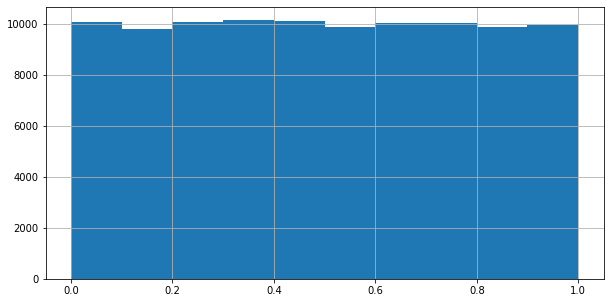

In [62]:
n_draws=100000
prior = pd.Series(np.random.uniform(0,1, size=n_draws))

plt.figure(figsize=(10,5),facecolor='w')
prior.hist();


def generative_model(param):
    # 100 bots
    result = np.random.binomial(100, param)
    return result


compraron = list()
for p in prior:
    compraron.append(generative_model(p))
    


Produce a set of descriptive statistics for the posterior distribution.

In [63]:
# Observe que un día de 100 personas que visitaron compraron 14
posterior = prior[list(map(lambda x: x == 14, compraron))]
posterior

74       0.194362
148      0.143428
162      0.146756
360      0.189212
466      0.133357
           ...   
99578    0.216129
99735    0.125325
99806    0.203385
99827    0.115996
99874    0.129167
Length: 1003, dtype: float64

What is the 90% credible interval range?

What is the Maximum Likelihood Estimate?